# Convert OpenGWAS Project vcf file to PLINK GWAS formats  

Type 2 Diabetes GWAS data downloaded from OpenGWAS Project:  
https://gwas.mrcieu.ac.uk/datasets/ieu-a-25/ 

#### Imports & Setup

In [1]:
import pandas as pd
import io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input file
vcf_file = '../data/gwas_vcf/ieu-a-25.vcf'

## output files
assoc_out = '../data/gwas_plink/ieu-a-25.assoc'
logistic_out = '../data/gwas_plink/ieu-a-25.assoc.logistic'
vcf_out = '../data/gwas_plink/ieu-a-25.vcf.extracted.gwas'

### Read in VCF file  

In [3]:
!grep "##FORMAT="  {vcf_file}

##FORMAT=<ID=ES,Number=A,Type=Float,Description="Effect size estimate relative to the alternative allele">
##FORMAT=<ID=SE,Number=A,Type=Float,Description="Standard error of effect size estimate">
##FORMAT=<ID=LP,Number=A,Type=Float,Description="-log10 p-value for effect estimate">
##FORMAT=<ID=AF,Number=A,Type=Float,Description="Alternate allele frequency in the association study">
##FORMAT=<ID=SS,Number=A,Type=Float,Description="Sample size used to estimate genetic effect">
##FORMAT=<ID=EZ,Number=A,Type=Float,Description="Z-score provided if it was used to derive the EFFECT and SE fields">
##FORMAT=<ID=SI,Number=A,Type=Float,Description="Accuracy score of summary data imputation">
##FORMAT=<ID=NC,Number=A,Type=Float,Description="Number of cases used to estimate genetic effect">
##FORMAT=<ID=ID,Number=1,Type=String,Description="Study variant identifier">


In [4]:
!awk 'NR >= 110 && NR <= 115'  {vcf_file}

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	ieu-a-25
1	120437718	rs2793823	G	A	.	PASS	AF=0.132	ES:SE:LP:AF:SS:ID	0.0592119:0.0185129:2.85387:0.132:73902.3:rs2793823
1	120437884	rs2641348	A	G	.	PASS	AF=0.11	ES:SE:LP:AF:SS:ID	0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348
1	120438577	rs147294252	G	A	.	PASS	AF=0.006	ES:SE:LP:AF:SS:ID	0.123986:0.108496:0.60206:0.006:67530.5:rs147294252
1	120439109	rs6668119	G	C	.	PASS	AF=0.106	ES:SE:LP:AF:SS:ID	0.0685928:0.0202474:3.13668:0.106:73902.3:rs6668119
1	120440029	rs2027447	T	C	.	PASS	AF=0.11	ES:SE:LP:AF:SS:ID	0.0676586:0.0200183:3.16749:0.11:73902.3:rs2027447


#### read vcf file using Python functions

In [5]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})


def read_header(path):
    with open(path, 'r') as f:
        header = [l for l in f if l.startswith('##')]
    return header

In [6]:
vcf_in = read_vcf(vcf_file)

vcf_in.shape
vcf_in.head()

(42089, 10)

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   
3     1  120439109    rs6668119   G   C    .   PASS  AF=0.106   
4     1  120440029    rs2027447   T   C    .   PASS   AF=0.11   

              FORMAT                                           ieu-a-25  
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  
3  ES:SE:LP:AF:SS:ID  0.0685928:0.0202474:3.13668:0.106:73902.3:rs66...  
4  ES:SE:LP:AF:SS:ID  0.0676586:0.0200183:3.16749:0.11:73902.3:rs202...

In [7]:
cols_input = vcf_in.columns.to_list()
cols_input

['CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 'ieu-a-25']

In [8]:
cols_input[-1]

'ieu-a-25'

### Extract vcf format fields --> separate columns

Extract format field names from 'FORMAT' column

In [9]:
_fmt_str = vcf_in.loc[0, 'FORMAT']
_fmt_str

_fmt_list = _fmt_str.split(':')
_fmt_list

'ES:SE:LP:AF:SS:ID'

['ES', 'SE', 'LP', 'AF', 'SS', 'ID']

Split sample column --> format fields

In [10]:
vcf_in[_fmt_list] = vcf_in[cols_input[-1]].str.split(':', expand=True)

vcf_in.head()

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   
3     1  120439109    rs6668119   G   C    .   PASS  AF=0.106   
4     1  120440029    rs2027447   T   C    .   PASS   AF=0.11   

              FORMAT                                           ieu-a-25  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...   
3  ES:SE:LP:AF:SS:ID  0.0685928:0.0202474:3.13668:0.106:73902.3:rs66...   
4  ES:SE:LP:AF:SS:ID  0.0676586:0.0200183:3.16749:0.11:73902.3:rs202...   

          ES         SE       LP     AF       SS  
0  0.0592119  0.0185129  2.85387  0.132  73902.3  
1   0.064851  0.0200746  2.95861   0.11  73902.3  
2   0.123986   0.108496  0.60206  0.006  67530.5  
3  0.0685928  0.0202474  3.13668  0.106  73902.3  
4  0.0676586  0.0200183  3.16749   0.11  73902.3

<br>  

<br>  

# Convert extracted vcf DF to PLINK format

https://www.cog-genomics.org/plink/1.9/formats#assoc



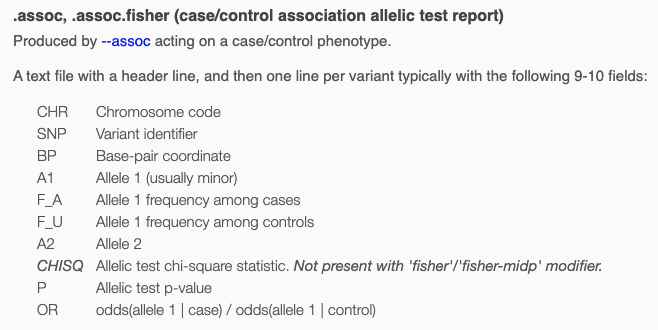  

https://www.cog-genomics.org/plink/1.9/formats#assoc_linear  


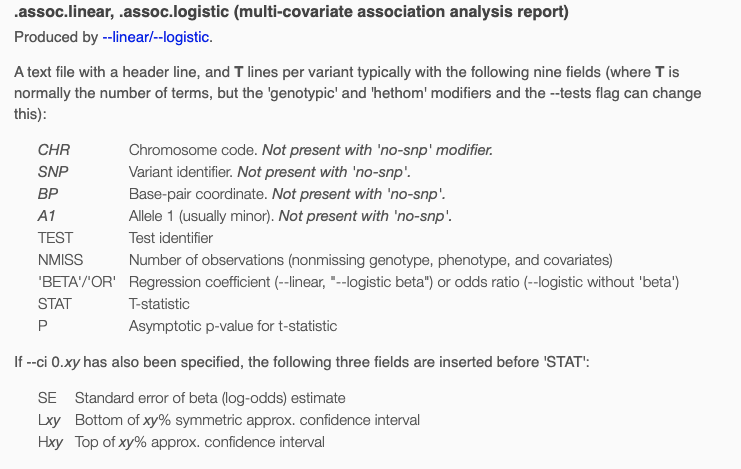  



**add renamed columns:**  
* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = .logistic number of observations (nonmissing genotype, phenotype, & covar)

**add columns with "dummy" values:**  
* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)    
* STAT = .logistic t-statistic  


**convert vcf columns to plink columns:**  

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  


In [11]:
cols_assoc = ['CHR', 'SNP', 'BP', 'A1', 'F_A', 'F_U', 'A2', 'CHISQ', 'P', 'OR']
cols_logistic = ['CHR', 'SNP', 'BP', 'A1', 'TEST', 'NMISS', 'OR', 'SE', 'STAT', 'P']

In [12]:
df = vcf_in.copy() 

In [13]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ieu-a-25', 'ES', 'SE', 'LP', 'AF', 'SS'],
      dtype='object')

#### 1) add renamed columns:  

* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = SS = sample size (approx, not quite the number of observations)

In [14]:
df['CHR'] = df['CHROM'].copy()
df['BP'] = df['POS'].copy()
df['A1'] = df['ALT'].copy()
df['A2'] = df['REF'].copy()
df['OR'] = df['ES'].copy()
df['NMISS'] = df['SS'].copy()

df.head(3)

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   

              FORMAT                                           ieu-a-25  ...  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  ...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  ...   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  ...   

          SE       LP     AF       SS CHR         BP  A1 A2         OR  \
0  0.0185129  2.85387  0.132  73902.3   1  120437718   A  G  0.0592119   
1  0.0200746  2.95861   0.11  73902.3   1  120437884   G  A   0.064851   
2   0.108496  0.60206  0.006  67530.5   1  120438577   A  G   0.123986   

     NMISS  
0  73902.3  
1  73902.3  
2  67530.5  

[3 rows x 21 columns]

#### 2) add columns with "dummy" values:  

* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)  
* STAT = .logistic t-statistic  


In [15]:
df['F_A'] = 0.0 
df['F_U'] = 0.0 
df['CHISQ'] = 0.0 
df['TEST'] = 'ADD' 
df['STAT'] = 0.0 

df.head(3)

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   

              FORMAT                                           ieu-a-25  ...  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  ...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  ...   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  ...   

          BP A1 A2         OR    NMISS  F_A  F_U CHISQ TEST STAT  
0  120437718  A  G  0.0592119  73902.3  0.0  0.0   0.0  ADD  0.0  
1  120437884  G  A   0.064851  73902.3  0.0  0.0   0.0  ADD  0.0  
2  120438577  A  G   0.123986  67530.5  0.0  0.0   0.0  ADD  0.0  

[3 rows x 26 columns]

#### 3) convert vcf columns to plink columns:    

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  

In [16]:
df['SNP'] = df['CHROM'].astype(str) + '_' + df['POS'].astype(str) + '_' + df['ID'].astype(str) 

df.head(3)

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   

              FORMAT                                           ieu-a-25  ...  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  ...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  ...   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  ...   

  A1 A2         OR    NMISS  F_A  F_U  CHISQ TEST STAT  \
0  A  G  0.0592119  73902.3  0.0  0.0    0.0  ADD  0.0   
1  G  A   0.064851  73902.3  0.0  0.0    0.0  ADD  0.0   
2  A  G   0.123986  67530.5  0.0  0.0    0.0  ADD  0.0   

                       SNP  
0    1_120437718_rs2793823  
1    1_120437884_rs2641348  
2  1_120438577_rs147294252  

[3 rows x 27 columns]

In [17]:
df['LP'] = df['LP'].astype(float)

df['P'] = pow(10, -df['LP'])

df.head(3)

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0     1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1     1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2     1  120438577  rs147294252   G   A    .   PASS  AF=0.006   

              FORMAT                                           ieu-a-25  ...  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  ...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  ...   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  ...   

  A2         OR    NMISS  F_A  F_U CHISQ  TEST STAT                      SNP  \
0  G  0.0592119  73902.3  0.0  0.0   0.0   ADD  0.0    1_120437718_rs2793823   
1  A   0.064851  73902.3  0.0  0.0   0.0   ADD  0.0    1_120437884_rs2641348   
2  G   0.123986  67530.5  0.0  0.0   0.0   ADD  0.0  1_120438577_rs147294252   

        P  
0  0.0014  
1  0.0011  
2  0.2500  

[3 rows x 28 columns]

In [18]:
df[['LP', 'P']].head(10)

LP        P
0  2.853870  0.00140
1  2.958610  0.00110
2  0.602060  0.25000
3  3.136680  0.00073
4  3.167490  0.00068
5  0.060481  0.87000
6  2.920820  0.00120
7  1.795880  0.01600
8  0.259637  0.55000
9  3.075720  0.00084

<br>  

## Extract columns for .assoc + .logistic output files

In [19]:
df_assoc = df[cols_assoc]
df_logistic = df[cols_logistic]

df_assoc.shape
df_logistic.shape
df.shape

(42089, 10)

(42089, 10)

(42089, 28)

In [20]:
df_assoc.head(2)
df_logistic.head(2)

CHR                    SNP         BP A1  F_A  F_U A2  CHISQ       P  \
0   1  1_120437718_rs2793823  120437718  A  0.0  0.0  G    0.0  0.0014   
1   1  1_120437884_rs2641348  120437884  G  0.0  0.0  A    0.0  0.0011   

          OR  
0  0.0592119  
1   0.064851

CHR                    SNP         BP A1 TEST    NMISS         OR  \
0   1  1_120437718_rs2793823  120437718  A  ADD  73902.3  0.0592119   
1   1  1_120437884_rs2641348  120437884  G  ADD  73902.3   0.064851   

          SE  STAT       P  
0  0.0185129   0.0  0.0014  
1  0.0200746   0.0  0.0011

### write output files

In [21]:
df_assoc.to_csv(assoc_out, header=True, index=False, sep=' ')
df_logistic.to_csv(logistic_out, header=True, index=False, sep=' ')

In [22]:
df.to_csv(vcf_out, header=True, index=False, sep='\t')